# Influencers in Social Networks

by [Jesus Solano](http://www.jesussolano.com/) -- [Jesus Solano](http://www.jesussolano.com/) -- [Jesus Solano](http://www.jesussolano.com/) -- [Jesus Solano](http://www.jesussolano.com/)


version 1.0, June 13 2018

In [2]:
import pandas as pd
data = pd.read_csv("https://github.com/jesugome/InfluencersInSocialNetworks/raw/master/datasets/train.csv",sep=",")
data.head()

Choice  A_follower_count  A_following_count  A_listed_count  \
0       0               228                302               3   
1       0             21591               1179             228   
2       0              7310               1215             101   
3       0                20                  7               2   
4       1             45589                862            2641   

   A_mentions_received  A_retweets_received  A_mentions_sent  A_retweets_sent  \
0             0.583979             0.100503         0.100503         0.100503   
1            90.456506            25.798292         5.709329         1.111159   
2            25.503644             9.556347         5.361519         0.591206   
3             7.690824             0.277306         1.331508         0.100503   
4           148.854279            36.998884        27.881768         3.333492   

     A_posts  A_network_feature_1         ...           B_following_count  \
0   0.362150                    2         ...                       29808   
1   5.176620                  369         ...                         848   
2   3.589718                   95         ...                         482   
3   2.830627                    6         ...                       17637   
4  23.861282                  551         ...                        1711   

   B_listed_count  B_mentions_received  B_retweets_received  B_mentions_sent  \
0            1689            15.430498             3.984029         8.204331   
1            1610            40.495021             8.943607         3.227677   
2             206             0.734696             0.354379         0.603202   
3             278           572.874856           390.293681        27.552040   
4             181            21.601866             3.581661         6.764657   

   B_retweets_sent    B_posts  B_network_feature_1  B_network_feature_2  \
0         0.332423   6.988815                   66            75.530303   
1         0.564343   1.070321                  163           132.030675   
2         0.100503   0.603202                    3            10.333333   
3         7.167557  32.101906                 1762            23.469296   
4         1.119727   4.563246                   85            48.500000   

   B_network_feature_3  
0          1916.893939  
1          2931.515337  
2           277.333333  
3          1395.845634  
4          1993.627907  

[5 rows x 23 columns]

In [3]:
# Split the original data into train and test. 

from sklearn import model_selection 

dataSize = data.shape[0]
print("El archivo contiene: ",dataSize)

percentage = 0.30 

xTrain,xTest,yTrain,yTest = model_selection.train_test_split(data.iloc[:,1:],data.iloc[:,0],test_size=percentage,random_state=22)



El archivo contiene:  5500


## Pre-processing Data

In [4]:
# Import the neccesary libraries and set a seed. 
import numpy as np


np.random.seed(22)

## Random Forest Classifier

In [5]:
# Random Forest Classifier. 

from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_jobs=2,n_estimators=100, random_state=0)

rfc.fit(xTrain, yTrain)

predictions = rfc.predict(xTest) 

In [6]:
# Calculate testing accuracy

from sklearn import metrics 

print("Accuracy = ",metrics.accuracy_score(yTest, predictions))

Accuracy =  0.7618181818181818


In [7]:
# Confusion matrix.
pd.crosstab(yTest, predictions)

col_0     0    1
Choice          
0       608  211
1       182  649

In [8]:
# Calculating the AUC score. 
predictionsProbability = rfc.predict_proba(xTest)[:,1]
predictionsProbability 
print("AUC = ",metrics.roc_auc_score(yTest, predictionsProbability))

AUC =  0.8576806266336952


Text(0,0.5,'True Positive Rate (Sensitivity)')

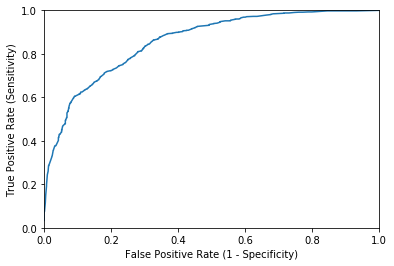

In [9]:
# Plot the ROC curve.
%matplotlib inline
import matplotlib.pyplot as plt
fpr, tpr, thresholds = metrics.roc_curve(yTest, predictionsProbability)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

In [10]:
# K-Fold Cross validation. 
from sklearn.model_selection import cross_val_score
k=10
scores=cross_val_score(rfc,data.iloc[:,1:],data.iloc[:,0],cv=k)
print("Accuracy: %0.3f (+/- %0.3f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.769 (+/- 0.033)


In [11]:
# K-Fold Cross validation. 
k=10
scores=cross_val_score(rfc,data.iloc[:,1:],data.iloc[:,0],cv=k,scoring='roc_auc')
print("AUC: %0.3f (+/- %0.3f)" % (scores.mean(), scores.std() * 2))

AUC: 0.859 (+/- 0.028)


## k-nearest Neighbors

In [12]:
# K-nearest neighbors Classifier. 

from sklearn.neighbors import KNeighborsClassifier

# Parameter is the number of neighbors. 

rfc = KNeighborsClassifier(30)

rfc.fit(xTrain, yTrain)

predictions = rfc.predict(xTest) 

In [13]:
# Calculate testing accuracy

from sklearn import metrics 

print("Accuracy = ",metrics.accuracy_score(yTest, predictions))

Accuracy =  0.7448484848484849


In [14]:
# Confusion matrix.
pd.crosstab(yTest, predictions)

col_0     0    1
Choice          
0       591  228
1       193  638

In [15]:
# Calculating the AUC score. 
predictionsProbability = rfc.predict_proba(xTest)[:,1]
predictionsProbability 
print("AUC = ",metrics.roc_auc_score(yTest, predictionsProbability))

AUC =  0.8232031372825596


Text(0,0.5,'True Positive Rate (Sensitivity)')

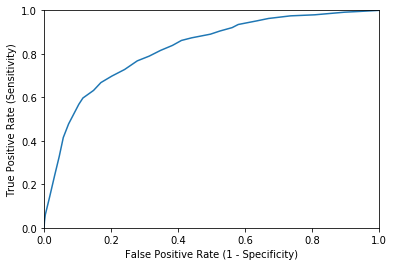

In [16]:
# Plot the ROC curve.
%matplotlib inline
import matplotlib.pyplot as plt
fpr, tpr, thresholds = metrics.roc_curve(yTest, predictionsProbability)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

In [17]:
# K-Fold Cross validation. 
from sklearn.model_selection import cross_val_score
k=10
scores=cross_val_score(rfc,data.iloc[:,1:],data.iloc[:,0],cv=k)
print("Accuracy: %0.3f (+/- %0.3f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.751 (+/- 0.045)


In [18]:
# K-Fold Cross validation. 
k=10
scores=cross_val_score(rfc,data.iloc[:,1:],data.iloc[:,0],cv=k,scoring='roc_auc')
print("AUC: %0.3f (+/- %0.3f)" % (scores.mean(), scores.std() * 2))

AUC: 0.833 (+/- 0.043)


##  Linear Support Vector Classification

In [ ]:
# Support vector Classifier. 

from sklearn.svm import SVC

# Parameter is the number of neighbors. 

rfc = SVC(kernel="linear", C=0.025)

rfc.fit(xTrain, yTrain)

predictions = rfc.predict(xTest) 

In [ ]:
# Calculate testing accuracy

from sklearn import metrics 

print("Accuracy = ",metrics.accuracy_score(yTest, predictions))

In [46]:
# Confusion matrix.
pd.crosstab(yTest, predictions)

col_0     0    1
Choice          
0       591  228
1       193  638

In [47]:
# Calculating the AUC score. 
predictionsProbability = rfc.predict_proba(xTest)[:,1]
predictionsProbability 
print("AUC = ",metrics.roc_auc_score(yTest, predictionsProbability))

AUC =  0.8232031372825596


Text(0,0.5,'True Positive Rate (Sensitivity)')

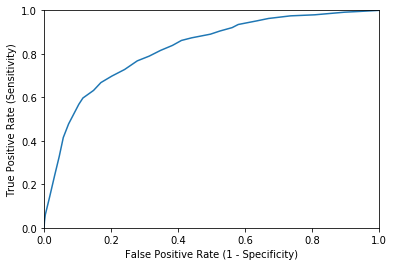

In [48]:
# Plot the ROC curve.
%matplotlib inline
import matplotlib.pyplot as plt
fpr, tpr, thresholds = metrics.roc_curve(yTest, predictionsProbability)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

In [49]:
# K-Fold Cross validation. 
from sklearn.model_selection import cross_val_score
k=10
scores=cross_val_score(rfc,data.iloc[:,1:],data.iloc[:,0],cv=k)
print("Accuracy: %0.3f (+/- %0.3f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.751 (+/- 0.045)


In [50]:
# K-Fold Cross validation. 
k=10
scores=cross_val_score(rfc,data.iloc[:,1:],data.iloc[:,0],cv=k,scoring='roc_auc')
print("AUC: %0.3f (+/- %0.3f)" % (scores.mean(), scores.std() * 2))

AUC: 0.833 (+/- 0.043)


## Gaussian Process Classifier

In [44]:
# Gaussian Process Classifier.

from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF

rfc = GaussianProcessClassifier(1.0 * RBF(1.0))

rfc.fit(xTrain, yTrain)

predictions = rfc.predict(xTest) 

In [45]:
# Calculate testing accuracy

from sklearn import metrics 

print("Accuracy = ",metrics.accuracy_score(yTest, predictions))

Accuracy =  0.7448484848484849


In [46]:
# Confusion matrix.
pd.crosstab(yTest, predictions)

col_0     0    1
Choice          
0       591  228
1       193  638

In [47]:
# Calculating the AUC score. 
predictionsProbability = rfc.predict_proba(xTest)[:,1]
predictionsProbability 
print("AUC = ",metrics.roc_auc_score(yTest, predictionsProbability))

AUC =  0.8232031372825596


Text(0,0.5,'True Positive Rate (Sensitivity)')

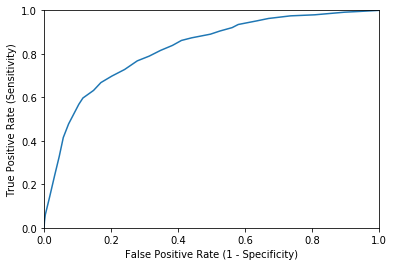

In [48]:
# Plot the ROC curve.
%matplotlib inline
import matplotlib.pyplot as plt
fpr, tpr, thresholds = metrics.roc_curve(yTest, predictionsProbability)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

In [49]:
# K-Fold Cross validation. 
from sklearn.model_selection import cross_val_score
k=10
scores=cross_val_score(rfc,data.iloc[:,1:],data.iloc[:,0],cv=k)
print("Accuracy: %0.3f (+/- %0.3f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.751 (+/- 0.045)


In [50]:
# K-Fold Cross validation. 
k=10
scores=cross_val_score(rfc,data.iloc[:,1:],data.iloc[:,0],cv=k,scoring='roc_auc')
print("AUC: %0.3f (+/- %0.3f)" % (scores.mean(), scores.std() * 2))

AUC: 0.833 (+/- 0.043)


## Decision Tree Classifier

In [19]:
# Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier

rfc = DecisionTreeClassifier(max_depth=5)

rfc.fit(xTrain, yTrain)

predictions = rfc.predict(xTest) 

In [20]:
# Calculate testing accuracy

from sklearn import metrics 

print("Accuracy = ",metrics.accuracy_score(yTest, predictions))

Accuracy =  0.7460606060606061


In [21]:
# Confusion matrix.
pd.crosstab(yTest, predictions)

col_0     0    1
Choice          
0       601  218
1       201  630

In [22]:
# Calculating the AUC score. 
predictionsProbability = rfc.predict_proba(xTest)[:,1]
predictionsProbability 
print("AUC = ",metrics.roc_auc_score(yTest, predictionsProbability))

AUC =  0.850868145091972


Text(0,0.5,'True Positive Rate (Sensitivity)')

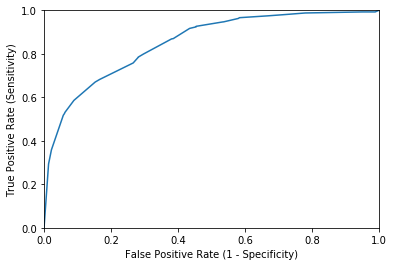

In [23]:
# Plot the ROC curve.
%matplotlib inline
import matplotlib.pyplot as plt
fpr, tpr, thresholds = metrics.roc_curve(yTest, predictionsProbability)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

In [24]:
# K-Fold Cross validation. 
from sklearn.model_selection import cross_val_score
k=10
scores=cross_val_score(rfc,data.iloc[:,1:],data.iloc[:,0],cv=k)
print("Accuracy: %0.3f (+/- %0.3f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.755 (+/- 0.037)


In [25]:
# K-Fold Cross validation. 
k=10
scores=cross_val_score(rfc,data.iloc[:,1:],data.iloc[:,0],cv=k,scoring='roc_auc')
print("AUC: %0.3f (+/- %0.3f)" % (scores.mean(), scores.std() * 2))

AUC: 0.837 (+/- 0.038)


## AdaBoost classifier

In [26]:
# AdaBoost classifier.

from sklearn.ensemble import AdaBoostClassifier

rfc = AdaBoostClassifier()

rfc.fit(xTrain, yTrain)

predictions = rfc.predict(xTest) 

In [27]:
# Calculate testing accuracy

from sklearn import metrics 

print("Accuracy = ",metrics.accuracy_score(yTest, predictions))

Accuracy =  0.7696969696969697


In [28]:
# Confusion matrix.
pd.crosstab(yTest, predictions)

col_0     0    1
Choice          
0       624  195
1       185  646

In [29]:
# Calculating the AUC score. 
predictionsProbability = rfc.predict_proba(xTest)[:,1]
predictionsProbability 
print("AUC = ",metrics.roc_auc_score(yTest, predictionsProbability))

AUC =  0.8678490248887359


Text(0,0.5,'True Positive Rate (Sensitivity)')

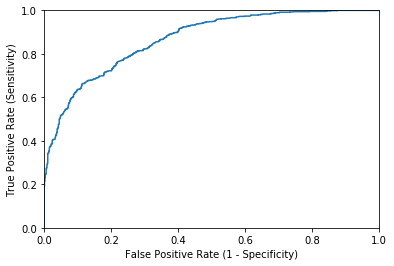

In [30]:
# Plot the ROC curve.
%matplotlib inline
import matplotlib.pyplot as plt
fpr, tpr, thresholds = metrics.roc_curve(yTest, predictionsProbability)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

In [31]:
# K-Fold Cross validation. 
from sklearn.model_selection import cross_val_score
k=10
scores=cross_val_score(rfc,data.iloc[:,1:],data.iloc[:,0],cv=k)
print("Accuracy: %0.3f (+/- %0.3f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.773 (+/- 0.044)


In [32]:
# K-Fold Cross validation. 
k=10
scores=cross_val_score(rfc,data.iloc[:,1:],data.iloc[:,0],cv=k,scoring='roc_auc')
print("AUC: %0.3f (+/- %0.3f)" % (scores.mean(), scores.std() * 2))

AUC: 0.862 (+/- 0.037)


## Naive Bayes Classificator

In [33]:
# Naive Bayes Classifier. 

from sklearn.naive_bayes import GaussianNB

# Parameter is the number of neighbors. 

rfc = GaussianNB()

rfc.fit(xTrain, yTrain)

predictions = rfc.predict(xTest) 

In [34]:
# Calculate testing accuracy

from sklearn import metrics 

print("Accuracy = ",metrics.accuracy_score(yTest, predictions))

Accuracy =  0.5448484848484848


In [35]:
# Confusion matrix.
pd.crosstab(yTest, predictions)

col_0     0    1
Choice          
0       121  698
1        53  778

In [36]:
# Calculating the AUC score. 
predictionsProbability = rfc.predict_proba(xTest)[:,1]
predictionsProbability 
print("AUC = ",metrics.roc_auc_score(yTest, predictionsProbability))

AUC =  0.6736936682785059


Text(0,0.5,'True Positive Rate (Sensitivity)')

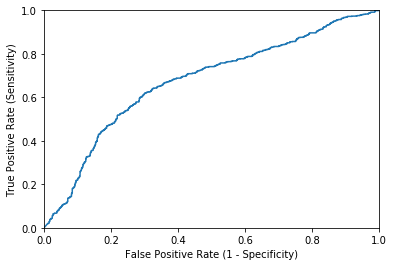

In [37]:
# Plot the ROC curve.
%matplotlib inline
import matplotlib.pyplot as plt
fpr, tpr, thresholds = metrics.roc_curve(yTest, predictionsProbability)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

In [38]:
# K-Fold Cross validation. 
from sklearn.model_selection import cross_val_score
k=10
scores=cross_val_score(rfc,data.iloc[:,1:],data.iloc[:,0],cv=k)
print("Accuracy: %0.3f (+/- %0.3f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.550 (+/- 0.023)


In [39]:
# K-Fold Cross validation. 
k=10
scores=cross_val_score(rfc,data.iloc[:,1:],data.iloc[:,0],cv=k,scoring='roc_auc')
print("AUC: %0.3f (+/- %0.3f)" % (scores.mean(), scores.std() * 2))

AUC: 0.715 (+/- 0.041)


## Quadratic Discriminant Analysis

In [40]:
# Quadratic Discriminant Analysis Classifier.

from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

rfc = QuadraticDiscriminantAnalysis()

rfc.fit(xTrain, yTrain)

predictions = rfc.predict(xTest) 

In [41]:
# Calculate testing accuracy

from sklearn import metrics 

print("Accuracy = ",metrics.accuracy_score(yTest, predictions))

Accuracy =  0.5806060606060606


In [42]:
# Confusion matrix.
pd.crosstab(yTest, predictions)

col_0     0    1
Choice          
0       199  620
1        72  759

In [43]:
# Calculating the AUC score. 
predictionsProbability = rfc.predict_proba(xTest)[:,1]
predictionsProbability 
print("AUC = ",metrics.roc_auc_score(yTest, predictionsProbability))

AUC =  0.7246671632953221


Text(0,0.5,'True Positive Rate (Sensitivity)')

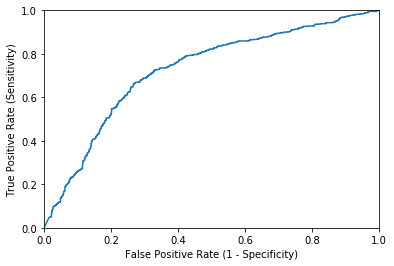

In [44]:
# Plot the ROC curve.
%matplotlib inline
import matplotlib.pyplot as plt
fpr, tpr, thresholds = metrics.roc_curve(yTest, predictionsProbability)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

In [45]:
# K-Fold Cross validation. 
from sklearn.model_selection import cross_val_score
k=10
scores=cross_val_score(rfc,data.iloc[:,1:],data.iloc[:,0],cv=k)
print("Accuracy: %0.3f (+/- %0.3f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.595 (+/- 0.031)


In [46]:
# K-Fold Cross validation. 
k=10
scores=cross_val_score(rfc,data.iloc[:,1:],data.iloc[:,0],cv=k,scoring='roc_auc')
print("AUC: %0.3f (+/- %0.3f)" % (scores.mean(), scores.std() * 2))

AUC: 0.734 (+/- 0.049)


## Ensemble Methods

In [8]:
# Validation data to upload results to kaggle.

validation = pd.read_csv("./datasets/test.csv",sep=",")
validation.head()

A_follower_count  A_following_count  A_listed_count  A_mentions_received  \
0            614689                400            5729           199.618296   
1            739581              10723            1279           102.026750   
2              3638               3341              85             2.793577   
3               613               1259              31             1.326041   
4           1352348                331           15647         19129.848662   

   A_retweets_received  A_mentions_sent  A_retweets_sent    A_posts  \
0            67.812469         9.366192         0.359534   4.094488   
1            96.771319         1.537322         1.054358   3.467754   
2             1.402703         2.594089         0.598150   3.802143   
3             0.356943         6.249678         2.323064   7.488116   
4         14552.733991         2.065418         0.580955  16.281502   

   A_network_feature_1  A_network_feature_2         ...           \
0                  669            39.193741         ...            
1                  432            11.191686         ...            
2                   11             9.416667         ...            
3                    4             5.000000         ...            
4                52580             3.092448         ...            

   B_following_count  B_listed_count  B_mentions_received  \
0                563           20057           967.720642   
1              12949            1311            38.260522   
2                320            3673          1207.190077   
3               3599            1072            10.300222   
4             147521           15043          9902.070379   

   B_retweets_received  B_mentions_sent  B_retweets_sent     B_posts  \
0           579.431128         4.473798         0.805680    6.241806   
1            10.697567        12.845793         1.584284   12.106662   
2           599.721600         0.842022         0.593199    7.044735   
3             3.828561         1.624092         0.100503    1.614287   
4          5012.055876        10.438460         0.100503  193.072418   

   B_network_feature_1  B_network_feature_2  B_network_feature_3  
0                 4027            57.643839          3201.293706  
1                  144           209.717241         21496.565517  
2                 3918             7.859818           637.983300  
3                   43           113.840909          2537.772727  
4                28564            10.964144          1035.955493  

[5 rows x 22 columns]